# Rishabh Agrawal
# Assignment 2

# Libraries

In [59]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pycountry_convert as pc
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Problem 1

Rishabh Agrawal
Viral Patel
Rutu Nanavati

We are continuing with the same project for Phase 2.

# Problem 2

For this problem i choose to critique the visulation done in this repository : https://github.com/mrinaaall/DS-5500/blob/master/InfoVizHW1.pdf

In his plot he chose to visuailize the plot Average Continents GDP for every year using a line plot. He decided to do this only for the top 4 continents rather than all the 6 continents. 
His visualization is very easy to interpret and it can be clearly seen as he mentioned in the explanation that europe has the highest GDP whereas africa has the lowest. He also states that there is a sudden jump in GDP of asia somewhere in between 2000's.
His plot is the same as mine, but as i chose to make the plot for all the 6 continents it comes out that growth in GDP of africa and Australia are similar which his plot failed to capture and we both came to the same conclusion that africa has the lowest growth from them all.
But he did cover the fact that America had a sudden dip around 2010-2015 which did not show up in my findings

# Problem 3

For this problem I choose to critique the following repository: https://github.com/bishishta/Information-Visualization/tree/master/DS5500_HW1
        
He has made several different plots in order to visualise the said problem. He made a plot of all 3 with time just to see the general trend of the said parameters. He made  a different plot for each of the continents separately. He got the conclusion that mainly for all the continents the GDP and life expectancy increased while with the decrease of child mortality rate overtime. 

He also chose to plot 4 continents instead of all the 6. We see for the life expectancy that they dip on mainly two points in time i.e. mainly around the time of 1920's and 1940's. He also concluded that mainly around 1925, Asia had the lowest life expectancy, after that Africa has the lowest life expectancy. Europe has the highest life expectancy according to him which goes in line with my findings too.

For child mortality he also chose a line plot and his plot is way to similar to mine and he has the same conclusions as me which are the the rate has decreased from 1800 to present tremendously, Europe has the lowest rate throughout time and Asia had the highest child mortality in the early 1800’s, closely followed by Africa but run current times Africa has taken over Asia in terms of child mortality rate. So majority of our conclusions are the same.

# Problem 4

In [18]:
gdp = pd.read_csv("dataset/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
life = pd.read_csv("dataset/ddf--datapoints--life_expectancy_years--by--geo--time.csv")

In [19]:
gdp = gdp.drop(columns=['geo'])
life = life.drop(columns=['geo'])

In [27]:
g = gdp.groupby('time').mean().reset_index()
l = life.groupby('time').mean() .reset_index()

In [35]:
new = pd.merge(left = g,right = l)
new.columns

Index(['time', 'income_per_person_gdppercapita_ppp_inflation_adjusted',
       'life_expectancy_years'],
      dtype='object')

C:\Users\risha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\risha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


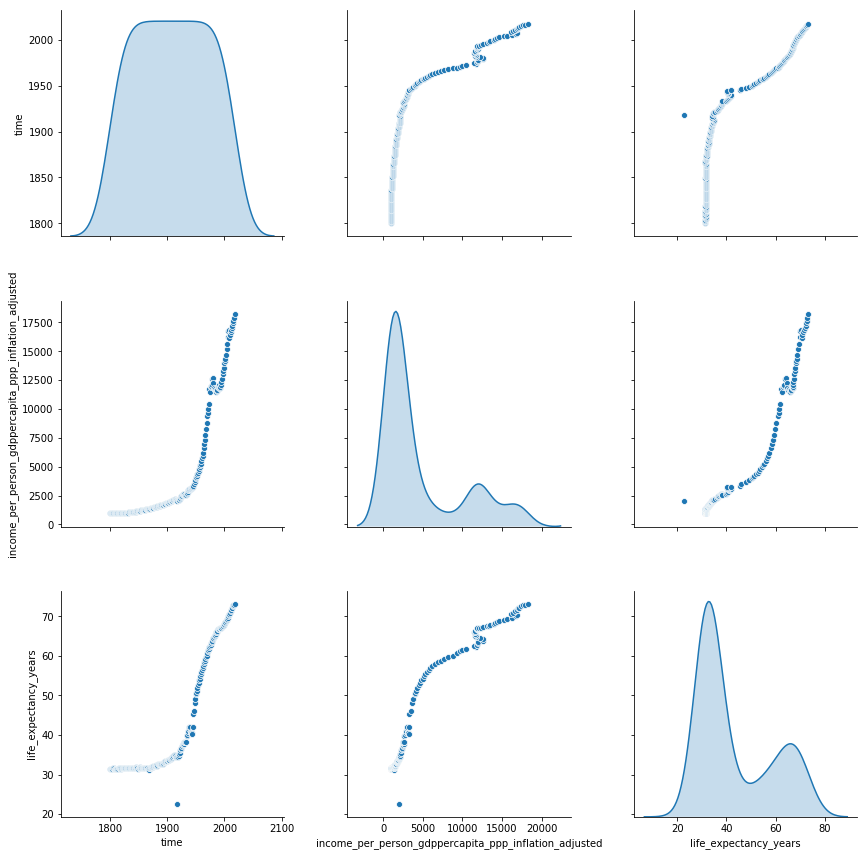

In [112]:
sns.pairplot(new, diag_kind = 'kde', size = 4)

### Before Training Scatter Plot

Text(0.5,1,'Scatter Plot between Mean of GDP and Life Expectancy per year')

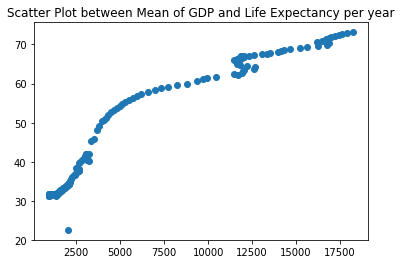

In [37]:
plt.scatter(new['income_per_person_gdppercapita_ppp_inflation_adjusted'], new['life_expectancy_years'])
plt.title("Scatter Plot between Mean of GDP and Life Expectancy per year")

In [115]:
X_train, X_test, y_train, y_test = tts(new.drop(columns=['life_expectancy_years', 'time']), new['life_expectancy_years'], test_size=0.33, random_state=42)

In [116]:
lr = Lr(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Coefficient of determination R^2 of the prediction of Training Data

In [90]:
lr.score(X_train, y_train)

0.9357277505461672

### R^2 Score of the Test Data

In [91]:
r2_score(lr.predict(X_test), y_test)

0.9181743031798489

In [94]:
lr.coef_

array([0.00283295])

### After Prediction Plot

Text(0.5,1,'Scatter Plot between Mean of GDP and Life Expectancy per year for Test Data')

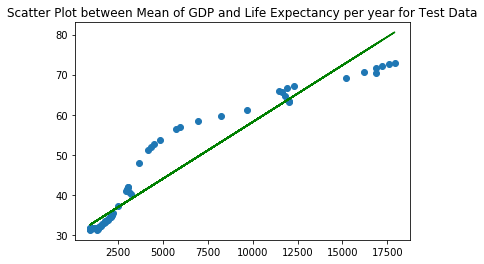

In [93]:
plt.scatter(X_test['income_per_person_gdppercapita_ppp_inflation_adjusted'], y_test)
plt.plot(X_test['income_per_person_gdppercapita_ppp_inflation_adjusted'], lr.predict(X_test), color="green")
plt.title("Scatter Plot between Mean of GDP and Life Expectancy per year for Test Data")

### Plot for the Whole Data

Text(0.5,1,'Scatter Plot between Mean of GDP and Life Expectancy per year for Whole Data')

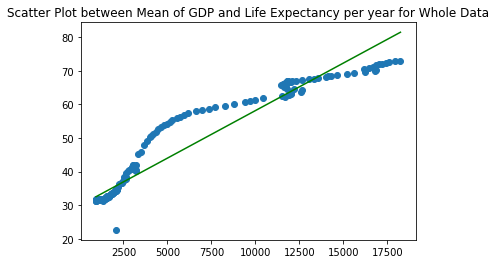

In [117]:
plt.scatter(new.drop(columns=['life_expectancy_years', 'time']), new['life_expectancy_years'])
plt.plot(new.drop(columns=['life_expectancy_years', 'time']), lr.predict(new.drop(columns=['life_expectancy_years', 'time'])), color="green")
plt.title("Scatter Plot between Mean of GDP and Life Expectancy per year for Whole Data")

# Problem 5

In [95]:
child = pd.read_csv("dataset/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
child = child.drop(columns=['geo'])
c = child.groupby('time').mean().reset_index()
p5 = pd.merge(left = g,right = c)

C:\Users\risha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


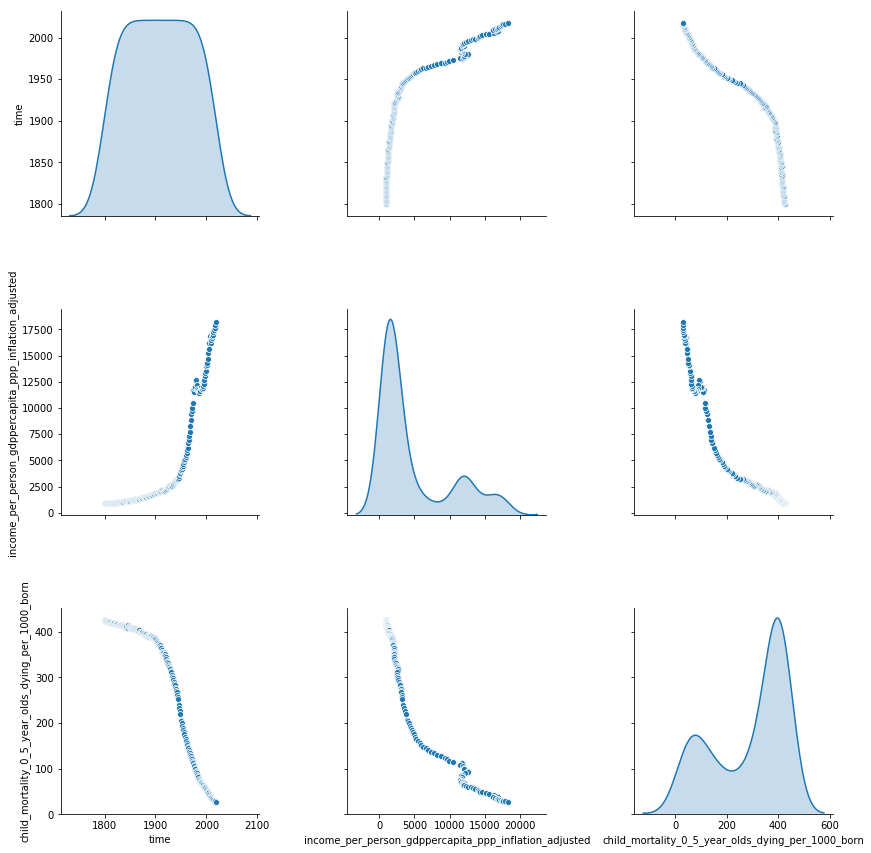

In [113]:
sns.pairplot(p5, diag_kind = 'kde', size=4)

Text(0.5,1,'Scatter Plot between Mean of GDP and Child Mortality')

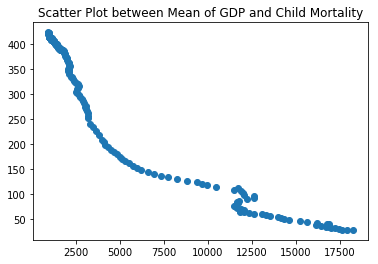

In [101]:
plt.scatter(p5['income_per_person_gdppercapita_ppp_inflation_adjusted'], p5['child_mortality_0_5_year_olds_dying_per_1000_born'])
plt.title("Scatter Plot between Mean of GDP and Child Mortality")

In [102]:
X_train, X_test, y_train, y_test = tts(p5.drop(columns=['child_mortality_0_5_year_olds_dying_per_1000_born', 'time']), p5['child_mortality_0_5_year_olds_dying_per_1000_born'], test_size=0.33, random_state=42)

In [103]:
lr = Lr(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Coefficient of determination R^2 of the prediction for Training Data

In [104]:
lr.score(X_train, y_train)

0.9092833816499357

### R^2 Score of the Test Data

In [105]:
r2_score(lr.predict(X_test), y_test)

0.8763269865834891

In [106]:
lr.coef_

array([-0.02678502])

### After Prediction Plot

Text(0.5,1,'Scatter Plot between Mean of GDP and Child Mortality per year for Test Data')

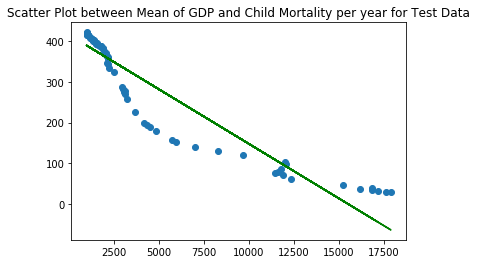

In [108]:
plt.scatter(X_test['income_per_person_gdppercapita_ppp_inflation_adjusted'], y_test)
plt.plot(X_test['income_per_person_gdppercapita_ppp_inflation_adjusted'], lr.predict(X_test), color="green")
plt.title("Scatter Plot between Mean of GDP and Child Mortality per year for Test Data")

### Plot for The whole data prediction : 

Text(0.5,1,'Scatter Plot between Mean of GDP and Child Mortality per year for Whole Data')

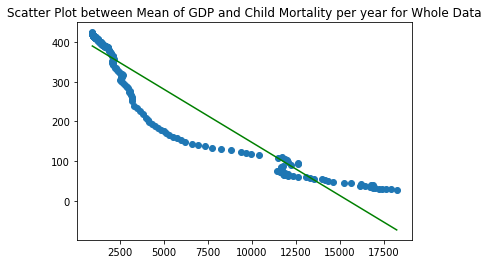

In [111]:
plt.scatter(p5.drop(columns=['child_mortality_0_5_year_olds_dying_per_1000_born', 'time']), p5['child_mortality_0_5_year_olds_dying_per_1000_born'])
plt.plot(p5.drop(columns=['child_mortality_0_5_year_olds_dying_per_1000_born', 'time']), lr.predict(p5.drop(columns=['child_mortality_0_5_year_olds_dying_per_1000_born', 'time'])), color="green")
plt.title("Scatter Plot between Mean of GDP and Child Mortality per year for Whole Data")